In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
# this dataset contains the meta data of the WDI dataset
df_countrydata = pd.read_csv('WDICountry.csv', sep=',') 


In [3]:

df = pd.read_csv('WDIData.csv', sep=',') 
df = df.drop('Unnamed: 66', axis=1)

# filter on period 1990 - 2020
years = list(map(str, range(1990, 2021)))
df = df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years]


# filter to keep only relevant variables in dataset
selected_indicators = ['GDP growth (annual %)',
                       'Individuals using the Internet (% of population)',
                       'Foreign direct investment, net inflows (BoP, current US$)',
                       'GNI per capita, PPP (current international $)',
                       'School enrollment, secondary (% net)',
                       'Individuals using the Internet (% of population)',
                        "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
                       'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)',
                       "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",
                       'Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)',
                       'Government expenditure on education, total (% of GDP)',
                       'Secondary education, duration (years)',
                       'Secondary education, pupils',
                       'Adjusted savings: education expenditure (% of GNI)',
                       'Adjusted savings: education expenditure (current US$)',
                       'Compulsory education, duration (years)',
                       'Secure Internet servers',
                       'Fixed telephone subscriptions',
                       'Access to electricity (% of population)',
                       'ICT goods exports (% of total goods exports)',
                       'Mobile cellular subscriptions',
                       'Mobile cellular subscriptions (per 100 people)',
                       'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)',
                       'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)',
                       'School enrollment, tertiary (% gross)',
                       'School enrollment, secondary (% gross)',
                       'School enrollment, primary (% gross)',
                       'Literacy rate, youth total (% of people ages 15-24)',
                       'Literacy rate, adult total (% of people ages 15 and above)']
df = df[df['Indicator Name'].isin(selected_indicators)]


df.head(2)


,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,29.089827,31.844384,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485
36,Africa Eastern and Southern,AFE,Adjusted savings: education expenditure (% of ...,NY.ADJ.AEDU.GN.ZS,4.426717,4.882468,6.162041,6.071125,6.04343,6.990009,...,4.755062,4.878013,4.563364,4.510963,4.433471,4.355900,4.442274,4.692845,4.791304,4.710650


In [4]:
df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='Year', value_name='Value')

df_wide = df_long.pivot_table(index=['Year', 'Country Name', 'Country Code'], 
                              columns='Indicator Name', values='Value', aggfunc='first')

df_wide = df_wide.reset_index()
df_wide['Year'] = df_wide['Year'].astype(int)
df_wide

Indicator Name,Year,Country Name,Country Code,Access to electricity (% of population),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),"Compulsory education, duration (years)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)",...,"Literacy rate, youth total (% of people ages 15-24)",Mobile cellular subscriptions,Mobile cellular subscriptions (per 100 people),"School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, secondary (% net)","School enrollment, tertiary (% gross)","Secondary education, duration (years)","Secondary education, pupils",Secure Internet servers
0,1990,Afghanistan,AFG,NaN,1.953448,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,29.041420,10.849960,NaN,2.211410,6.0,182340.0,NaN
1,1990,Africa Eastern and Southern,AFE,NaN,4.426717,NaN,NaN,NaN,NaN,NaN,...,NaN,7.880000e+03,0.002587,NaN,NaN,NaN,NaN,6.0,NaN,NaN
2,1990,Africa Western and Central,AFW,NaN,2.615379,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,7.0,NaN,NaN
3,1990,Albania,ALB,100.000000,2.800000,5.674630e+07,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,99.451752,90.081741,NaN,8.366360,8.0,475074.0,NaN
4,1990,Algeria,DZA,NaN,4.946261,2.957000e+09,NaN,NaN,NaN,NaN,...,NaN,4.700000e+02,0.001825,92.593437,59.414188,NaN,10.293140,6.0,2162469.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8206,2020,West Bank and Gaza,PSE,100.000000,NaN,NaN,10.0,0.26999,21.708691,1.94667,...,99.232353,4.274119e+06,83.783026,96.427193,91.027290,NaN,43.097672,8.0,806276.0,2573.0
8207,2020,World,WLD,90.521569,3.872891,NaN,10.0,NaN,NaN,NaN,...,91.883980,8.265682e+09,106.152775,102.407066,76.750740,NaN,40.244061,6.0,613156032.0,89189073.0
8208,2020,"Yemen, Rep.",YEM,73.757927,3.600000,NaN,9.0,NaN,NaN,NaN,...,NaN,1.517800e+07,50.888548,NaN,NaN,NaN,NaN,6.0,NaN,169.0
8209,2020,Zambia,ZMB,44.524475,3.563864,6.273000e+08,7.0,NaN,NaN,NaN,...,NaN,1.910421e+07,103.917835,NaN,NaN,NaN,NaN,5.0,NaN,745.0


<Axes: xlabel='Indicator Name'>

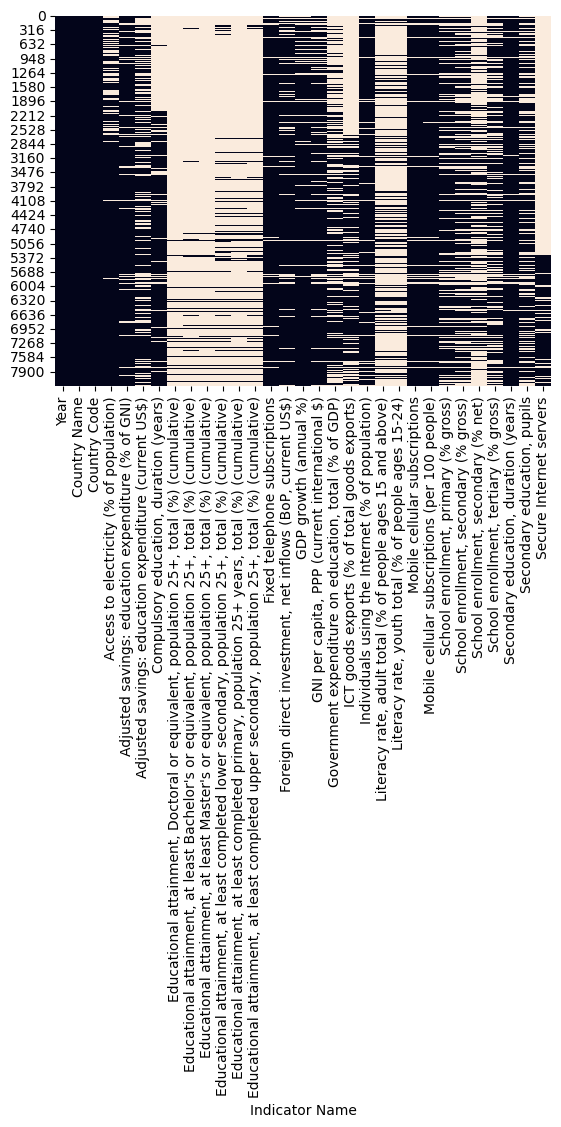

In [5]:
sns.heatmap(df_wide.isnull(), cbar=False)

In [6]:
# most of the time we need the data of all countries only thus we filter out all non-country data
df_countrydata = df_countrydata[df_countrydata['Income Group'].notna()]
country_codes = df_countrydata['Country Code'].unique()
df_all_countries = df_wide[df_wide['Country Code'].isin(country_codes)]

Check NA values

## Perspective 3: Digital divide and political stability

We think that the digital divide will lead to more tendencies of populism. We chose this topic because we are curious about the effects of the digital divide on democratic erosion and political stability. We think the dataset can provide us good indicators to measure digital divide and “tendencies” of populism. We can potentially use a few scientific sources to describe this operationalization. 

The world seems to be getting connected at a regular pace.
However there is an enormous digital divide between different parts of the world.

## Overige figuren:

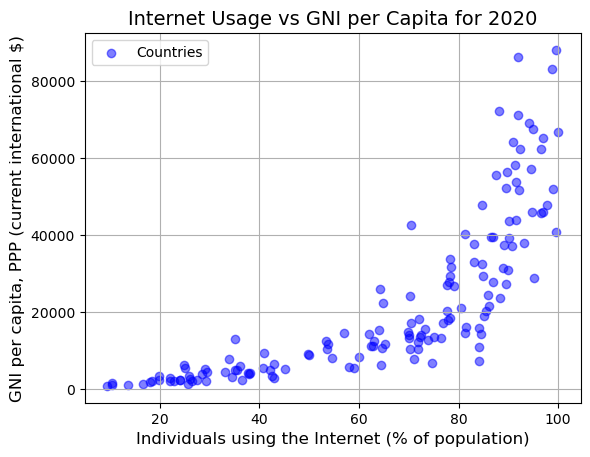

In [7]:
df_2020 = df_all_countries[df_all_countries['Year'] == 2020]

plt.scatter(df_2020['Individuals using the Internet (% of population)'], 
            df_2020['GNI per capita, PPP (current international $)'],
            alpha=0.5,
            color='blue')
plt.title('Internet Usage vs GNI per Capita for 2020', fontsize=14)
plt.xlabel('Individuals using the Internet (% of population)', fontsize=12)
plt.ylabel('GNI per capita, PPP (current international $)', fontsize=12)
plt.legend(['Countries'], loc='upper left')
plt.grid(True)
plt.show()

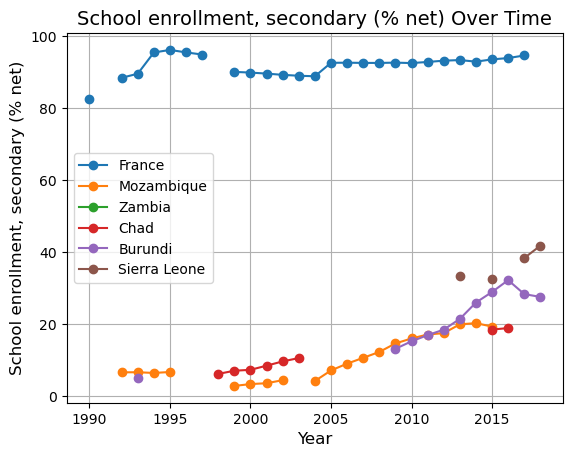

In [8]:

df = df_all_countries

start_year = 1990
end_year = 2020
df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]


country_groups = ["France",
                  "Mozambique",
                  "Zambia",
                  "Chad",
                  "Burundi",
                  "Sierra Leone"]

df_groups = df[df['Country Name'].isin(country_groups)]

for group in country_groups:
    group_data = df_groups[df_groups['Country Name'] == group]
    plt.plot(group_data['Year'], group_data['School enrollment, secondary (% net)'], marker='o', linestyle='-', label=group)

plt.title('School enrollment, secondary (% net) Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('School enrollment, secondary (% net)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

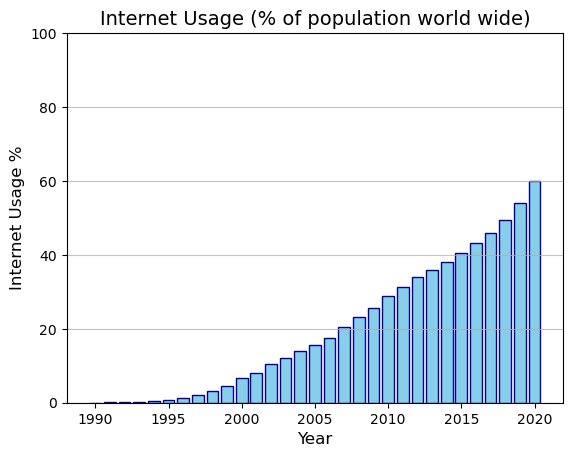

In [9]:
df = df_wide
df = df_wide[df_wide['Country Code'].isin(['WLD'])]

plt.bar(df['Year'], df['Individuals using the Internet (% of population)'], color='skyblue', edgecolor='darkblue')
plt.title('Internet Usage (% of population world wide)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Internet Usage %', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.75)
plt.show()

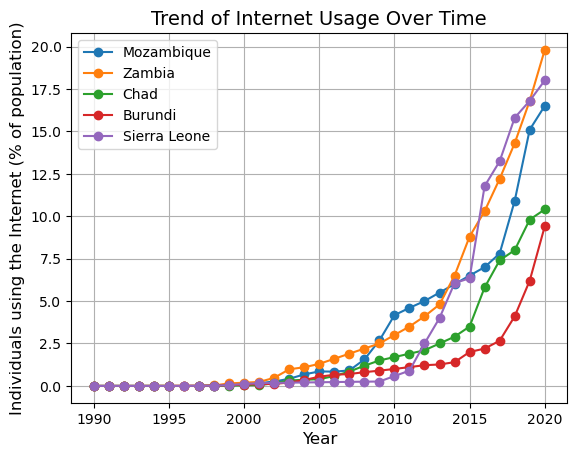

In [10]:
df = df_all_countries

start_year = 1990
end_year = 2020
df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]


country_groups =  ["Mozambique",
                  "Zambia",
                  "Chad",
                  "Burundi",
                  "Sierra Leone"]

df_groups = df[df['Country Name'].isin(country_groups)]

for group in country_groups:
    group_data = df_groups[df_groups['Country Name'] == group]
    plt.plot(group_data['Year'], group_data['Individuals using the Internet (% of population)'], marker='o', linestyle='-', label=group)

plt.title('Trend of Internet Usage Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Individuals using the Internet (% of population)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()